#Paquetes necesarios

In [47]:
import cv2  
import numpy as np
import matplotlib.pyplot as plt

TAREA: Captura una o varias imágenes con monedas no solapadas y algún objeto que no lo sea. Filtra los contornos que no se correpondan con monedas, y muestra el número total de monedas presentes en la imagen.

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Monedas:8
Diametros:[87.64540100097656, 93.00223541259766, 84.38028717041016, 91.0156478881836, 93.7452392578125, 102.72354125976562, 101.63707733154297, 94.02146911621094]


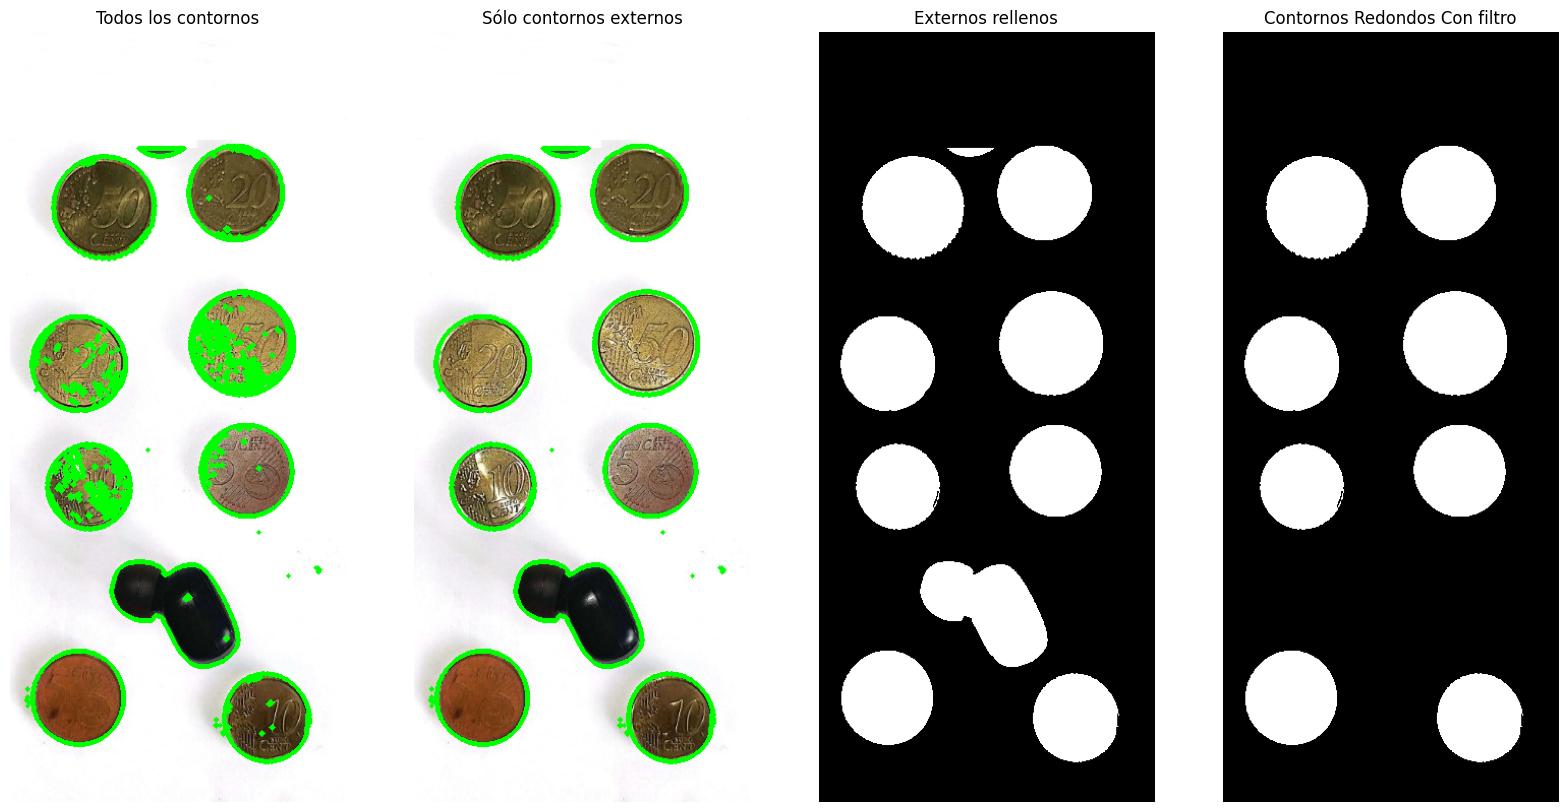

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Leer la imagen
img = cv2.imread('MonedasConObjetoSinSolape3.jpg')  # Reemplaza 'tu_imagen.png' por la ruta de tu imagen
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Aplicar umbral para obtener una imagen binaria
_,img_th1 = cv2.threshold(img_gray,200,255,cv2.THRESH_BINARY_INV)


# Encontrar todos los contornos (externos e internos)
#Obtiene todos los contornos, externos e internos
contornos, hierarchy = cv2.findContours(
    img_th1, #imagen
    cv2.RETR_TREE, #Modo de recuperación (lista, árbol, nivel superior)
    cv2.CHAIN_APPROX_SIMPLE #Método de aproximación del contorno
    )

#Obtiene únicamente los contornos externos
contornos2, hierarchy2 = cv2.findContours(img_th1, 
    cv2.RETR_EXTERNAL , 
    cv2.CHAIN_APPROX_SIMPLE)

# Dibujar contornos externos/internos en la imagen original
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
cv2.drawContours(img_rgb, contornos, -1, (0, 255, 0), 3)

plt.figure(figsize=(20, 10))  # Ajusta el tamaño de la figura aquí

plt.subplot(141)
plt.axis("off")
plt.imshow(img_rgb)
plt.title('Todos los contornos')

# Dibujar solo contornos externos
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
cv2.drawContours(img_rgb, contornos2, -1, (0, 255, 0), 3)

plt.subplot(142)
plt.axis("off")
plt.imshow(img_rgb)
plt.title('Sólo contornos externos')

# Dibujar contornos externos rellenos en una imagen vacía
img_cont = np.zeros(img_rgb.shape)
contornos_redondos = []
valores_monedas_lista = []

for c in contornos2:
    #Área delcontorno
    area = cv2.contourArea(c)

    #Dimensión mínima (útil en ocasiones)
    if area > 10:
        #Perímetro delcontorno
        perimetro = cv2.arcLength(c,True)
        #Contenedor alineado con ejes de la imagen
        x,y,w,h = cv2.boundingRect(c)
        #Mínimo contenedor ajustado para el contorno
        rect = cv2.minAreaRect(c)
        #Mínimo círculo que lo contiene
        (cx,cy),radio = cv2.minEnclosingCircle(c)
        #Elipse ajustada al contorno
        if c.shape[0] > 5:
            elipse = cv2.fitEllipse(c)

        ##################       Filtrado de Monedas
        # Calcular la relación entre el área y el cuadrado del perímetro
        relacion_redondez = (4 * np.pi * area) / (perimetro ** 2)

        # Define un umbral para considerar que un contorno es redondo
        umbral_redondez = 0.65  # Ajusta este valor según tus necesidades
        
        #0.4 para imagen original
        if relacion_redondez > umbral_redondez:
            contornos_redondos.append(c)

            # Determinar el valor de la moneda en función de su diámetro
            # Encuentra el círculo que mejor se ajusta al contorno
            (x, y), radio = cv2.minEnclosingCircle(c)

            # Calcula el diámetro a partir del radio
            diametro = 2 * radio
            valores_monedas_lista.append(diametro)



        #Dibuja los contornos
        cv2.drawContours(img_cont, [c], -1, (255,255,255), -1)



#Contorno externo relleno
plt.subplot(143)
plt.axis("off")
plt.imshow(img_cont)
plt.title('Externos rellenos')



# Dibuja los contornos redondos en una nueva imagen
img_cont_redondos = np.zeros(img_rgb.shape)
cv2.drawContours(img_cont_redondos, contornos_redondos, -1, (255, 255, 255), -1)

plt.subplot(144)
plt.axis("off")
plt.imshow(img_cont_redondos)
plt.title('Contornos Redondos Con filtro')

print("Monedas:" + str(len(valores_monedas_lista)))
print("Diametros:" + str(valores_monedas_lista))

plt.show()

TAREA: Captura una o varias imágenes con monedas no solapadas, y otras con monedas solapadas. Identificada una moneda de un euro en la imagen, por ejemplo con un clic de ratón, calcular la cantidad de dinero presente en la imagen. ¿Qué problemas han observado?




VERSION 1: SIN HOUGH

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Diámetro de la moneda seleccionada: 188.31565856933594 px
Escala actualizada: 24.2 / 188.31565856933594 = 0.12346291421878539
Monedas:8
Diametros:[16.233397014371484, 22.335840162282324, 18.815496815407908, 24.242637233616296, 19.725391515830182, 23.25, 21.193035808986867, 25.961905788255923]
Valores Monedas: [0.01, 0.2, 0.02, 0.5, 0.1, 1.0, 0.05, 2.0]
Valor Total: 3.88


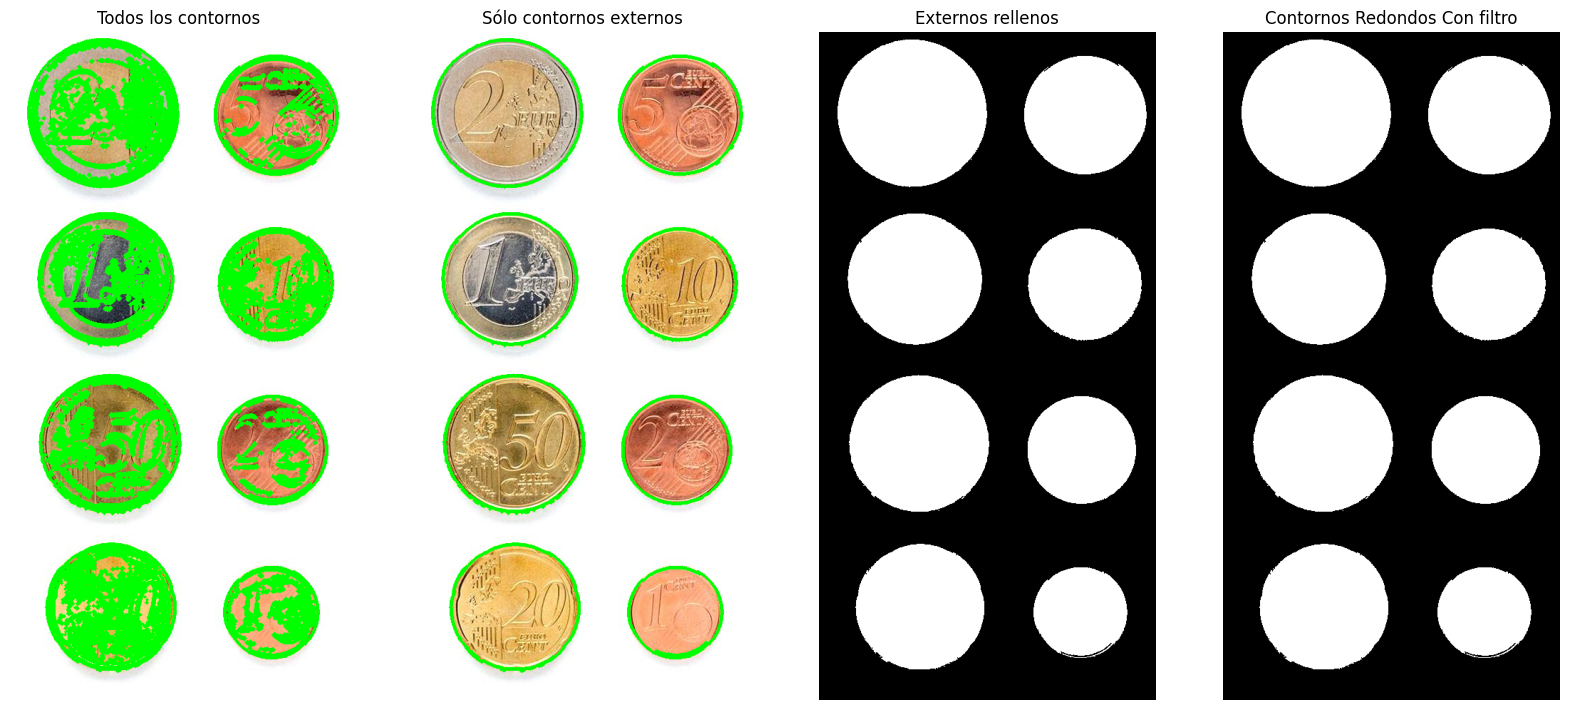

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Diámetro de la moneda seleccionada: 102.72354125976562 px
Escala actualizada: 24.2 / 102.72354125976562 = 0.2360705219330104
Monedas:8
Diametros:[20.69049555932853, 21.955086254788633, 19.919698433176027, 21.486111501034596, 22.130487560326735, 24.25, 23.993517893403087, 22.195697287172333]
Valores Monedas: [0.05, 0.2, 0.1, 0.05, 0.2, 0.5, 0.5, 0.2]
Valor Total: 1.8


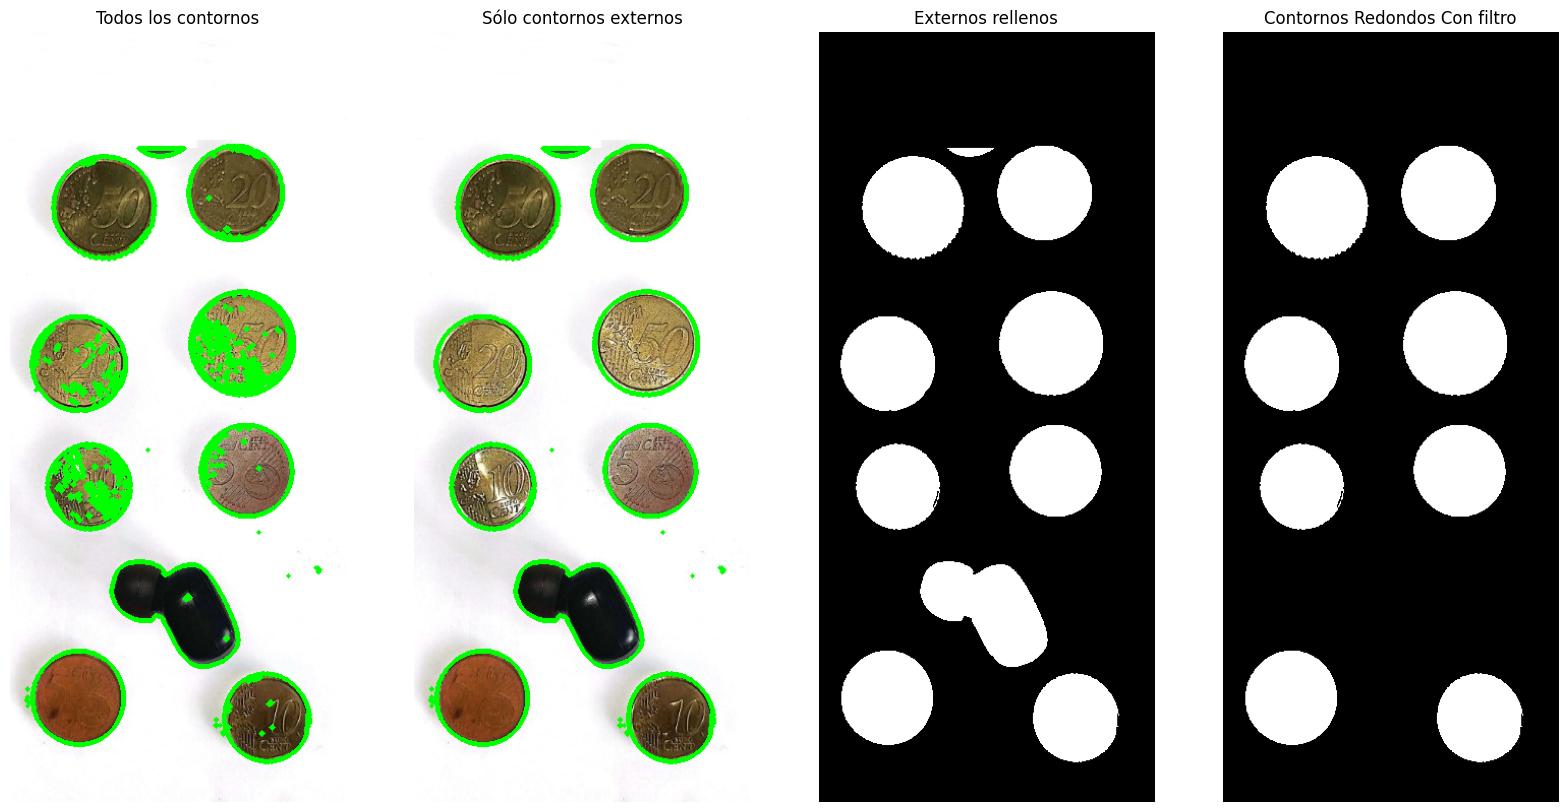

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Diámetro de la moneda seleccionada: 140.66427612304688 px
Escala actualizada: 24.2 / 140.66427612304688 = 0.1723962946980737
Monedas:5
Diametros:[24.25, 22.212353450761473, 38.41192577615583, 22.0937968008935, 19.500941902728123]
Valores Monedas: [0.5, 0.2, 2.0, 0.2, 0.1]
Valor Total: 3.0000000000000004


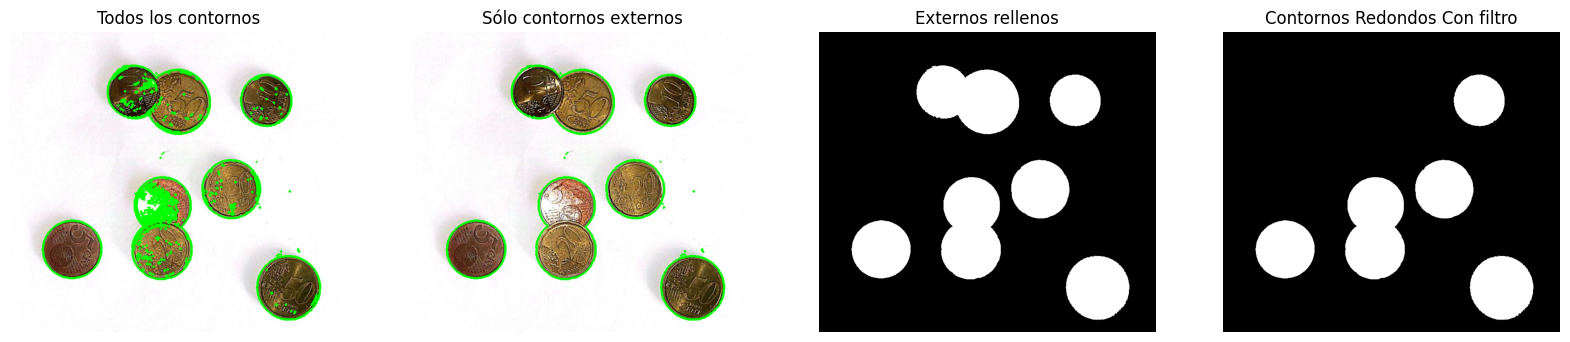

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt




def versionSinHough(name, umbral, escala_mm):
    def seleccionar_moneda(event, x, y, flags, param):
        global escala
        if event == cv2.EVENT_LBUTTONDOWN:
            for c in contornos_redondos:
                # Encuentra el círculo que mejor se ajusta al contorno
                (centro_x, centro_y), radio = cv2.minEnclosingCircle(c)
                # Calcula la distancia entre el punto de clic y el centro del círculo
                distancia = np.sqrt((x - centro_x) ** 2 + (y - centro_y) ** 2)

                # Si el punto de clic está dentro del círculo
                if distancia < radio:
                    diametro = 2 * radio
                    escala = escala_mm / diametro #50 centimos
                    print(f"Diámetro de la moneda seleccionada: {diametro} px")
                    print(f"Escala actualizada: 24.2 / {diametro} = {escala}")
                    break
            
    # Leer la imagen
    img = cv2.imread(name)
    #img = cv2.imread('Monedas.jpg')  # IMAGEN NO SOLAPADA
    #img = cv2.imread('Monedas.jpg')  # IMAGEN NO SOLAPADA
    #img = cv2.imread('MonedasConSolape.jpg')  # IMAGEN SOLAPADA


    img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # Aplicar umbral para obtener una imagen binaria
    _,img_th1 = cv2.threshold(img_gray,200,255,cv2.THRESH_BINARY_INV)


    # Encontrar todos los contornos (externos e internos)
    #Obtiene todos los contornos, externos e internos
    contornos, hierarchy = cv2.findContours(
        img_th1, #imagen
        cv2.RETR_TREE, #Modo de recuperación (lista, árbol, nivel superior)
        cv2.CHAIN_APPROX_SIMPLE #Método de aproximación del contorno
        )

    #Obtiene únicamente los contornos externos
    contornos2, hierarchy2 = cv2.findContours(img_th1, 
        cv2.RETR_EXTERNAL , 
        cv2.CHAIN_APPROX_SIMPLE)

    # Dibujar contornos externos/internos en la imagen original
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    cv2.drawContours(img_rgb, contornos, -1, (0, 255, 0), 3)

    plt.figure(figsize=(20, 10))  # Ajusta el tamaño de la figura aquí

    plt.subplot(141)
    plt.axis("off")
    plt.imshow(img_rgb)
    plt.title('Todos los contornos')

    # Dibujar solo contornos externos
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    cv2.drawContours(img_rgb, contornos2, -1, (0, 255, 0), 3)

    plt.subplot(142)
    plt.axis("off")
    plt.imshow(img_rgb)
    plt.title('Sólo contornos externos')

    # Dibujar contornos externos rellenos en una imagen vacía
    img_cont = np.zeros(img_rgb.shape)
    contornos_redondos = []
    valores_monedas_lista = []

    for c in contornos2:
        #Área delcontorno
        area = cv2.contourArea(c)

        #Dimensión mínima (útil en ocasiones)
        if area > 10:
            #Perímetro delcontorno
            perimetro = cv2.arcLength(c,True)
            #Contenedor alineado con ejes de la imagen
            x,y,w,h = cv2.boundingRect(c)
            #Mínimo contenedor ajustado para el contorno
            rect = cv2.minAreaRect(c)
            #Mínimo círculo que lo contiene
            (cx,cy),radio = cv2.minEnclosingCircle(c)
            #Elipse ajustada al contorno
            if c.shape[0] > 5:
                elipse = cv2.fitEllipse(c)

            ##################       Filtrado de Monedas
            # Calcular la relación entre el área y el cuadrado del perímetro
            relacion_redondez = (4 * np.pi * area) / (perimetro ** 2)



            # Define un umbral para considerar que un contorno es redondo
            umbral_redondez = umbral# Ajusta este valor según tus necesidades
            #0.4 para imagen original
            #0.65 imagen




            if relacion_redondez > umbral_redondez:
                contornos_redondos.append(c)

                # Determinar el valor de la moneda en función de su diámetro
                # Encuentra el círculo que mejor se ajusta al contorno
                (x, y), radio = cv2.minEnclosingCircle(c)

                # Calcula el diámetro a partir del radio
                diametro = 2 * radio
                valores_monedas_lista.append(diametro)



            #Dibuja los contornos
            cv2.drawContours(img_cont, [c], -1, (255,255,255), -1)



    #Contorno externo relleno
    plt.subplot(143)
    plt.axis("off")
    plt.imshow(img_cont)
    plt.title('Externos rellenos')



    # Dibuja los contornos redondos en una nueva imagen
    img_cont_redondos = np.zeros(img_rgb.shape)
    cv2.drawContours(img_cont_redondos, contornos_redondos, -1, (255, 255, 255), -1)

    plt.subplot(144)
    plt.axis("off")
    plt.imshow(img_cont_redondos)
    plt.title('Contornos Redondos Con filtro')


    cv2.imshow('Selecciona una moneda', img_rgb)

    cv2.setMouseCallback('Selecciona una moneda', seleccionar_moneda)
    ########################
    while True:
        cv2.imshow('Selecciona una moneda', img_rgb)
        key = cv2.waitKey(1) & 0xFF
        if key == 27:  # Presiona la tecla Esc para salir
            break
    ######################
    cv2.destroyAllWindows()

    # Multiplica cada valor en valores_monedas_lista por la escala
    for i in range(len(valores_monedas_lista)):
        valores_monedas_lista[i] *= escala


    valores_monedas = { #DIAMTRO MM : VALOR
        16.26: 0.01,
        18.75: 0.02,
        21.25: 0.05,  
        19.75: 0.1,  
        22.25: 0.2,  
        24.25: 0.5,
        23.25: 1.0,
        25.75: 2.0
    }

    valores_correspondientes = []

    for diametro in valores_monedas_lista:
        # Encuentra la escala (diámetro) más cercana en el diccionario
        escala_mas_cercana = min(valores_monedas, key=lambda x: abs(x - diametro))
        valor_correspondiente = valores_monedas[escala_mas_cercana]
        valores_correspondientes.append(valor_correspondiente)



    print("Monedas:" + str(len(valores_monedas_lista)))
    print("Diametros:" + str(valores_monedas_lista))
    print(f"Valores Monedas: {valores_correspondientes}")
    print(f"Valor Total: {sum(valores_correspondientes)}")
    plt.show()


versionSinHough('Monedas.jpg', 0.4, 23.25)
versionSinHough('MonedasConObjetoSinSolape3.jpg', 0.65, 24.25)
versionSinHough('MonedasConSolape.jpg', 0.65, 24.25)

VERSION 2: CON HOUGH

[]
Diámetro de la moneda seleccionada: 138 px
Escala actualizada: 24.2 / 138 = 0.17572463768115942
Numero de Monedas: 8
Diametros de todas las monedas: [126.4000015258789, 134.1999969482422, 130.60000610351562, 110.5999984741211, 121.19999694824219, 113.4000015258789, 139.60000610351562, 114.5999984741211] px
Valores de las monedas con escala aplicada: [22.21159447103307, 23.58224584054256, 22.949638753697492, 19.435144659401715, 21.297825550687485, 19.927174181177996, 24.531160492827926, 20.13804321012635]
Valores Monedas: [0.2, 1.0, 1.0, 0.1, 0.05, 0.1, 0.5, 0.1]
Valor Total: 3.0500000000000003


Text(0.5, 1.0, 'Contornos Redondos Con filtro')

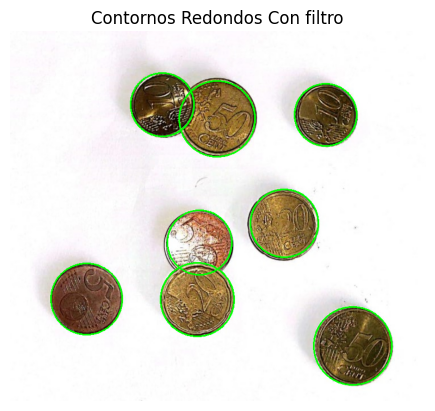

In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Inicializa la lista de diámetros de las monedas
diametros_monedas = []

def seleccionar_moneda(event, x, y, flags, param):
    global escala 
    global diametros_monedas
    if event == cv2.EVENT_LBUTTONDOWN:
        for i, det in enumerate(circ[0]):
            (centro_x, centro_y), radio = (int(det[0]), int(det[1])), int(det[2])
            distancia = np.sqrt((x - centro_x) ** 2 + (y - centro_y) ** 2)
            
            if distancia < radio:
                diametro = 2 * radio
                escala = 24.25/ diametro
                num_monedas = len(circ[0])
                valor_monedas = []

                for j in range(num_monedas):
                    diametro_monedas = 2 * circ[0][j][2]
                    #valor = valores_monedas.get(round(diametro_monedas, 2), 0.0)
                    #valor_monedas.append(valor)
                    diametros_monedas.append(diametro_monedas)  # Agrega el diámetro a la lista
                print(valor_monedas)
                print(f"Diámetro de la moneda seleccionada: {diametro} px")
                print(f"Escala actualizada: 24.2 / {diametro} = {escala}")
                print(f"Numero de Monedas: {num_monedas}")
                print(f"Diametros de todas las monedas: {diametros_monedas} px")


                # Multiplica cada valor en valores_monedas por la escala
                for k in range(num_monedas):
                    diametros_monedas[k] *= escala

                print(f"Valores de las monedas con escala aplicada: {diametros_monedas}")

                valores_monedas_ = { #DIAMTRO MM : VALOR
                    16.26: 0.01,
                    18.75: 0.02,
                    21.25: 0.05,  
                    19.75: 0.1,  
                    22.25: 0.2,  
                    24.25: 0.5,
                    23.25: 1.0,
                    25.75: 2.0
                }

                valores_correspondientes = []

                for diametro in diametros_monedas:
                    # Encuentra la escala (diámetro) más cercana en el diccionario
                    escala_mas_cercana = min(valores_monedas_, key=lambda x: abs(x - diametro))
                    valor_correspondiente = valores_monedas_[escala_mas_cercana]
                    valores_correspondientes.append(valor_correspondiente)
                

                print(f"Valores Monedas: {valores_correspondientes}")
                print(f"Valor Total: {sum(valores_correspondientes)}")
                break



img = cv2.imread('MonedasConSolape.jpg')  # IMAGEN SOLAPADA
# Conversión a gris
gris = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
# Suaviza altas frecuencias
pimg = cv2.medianBlur(gris, 7)
# Localiza Círculos
circ = cv2.HoughCircles(
        pimg,  # imagen 
        cv2.HOUGH_GRADIENT,  # tipo de detección
        1,
        100,  # distancia mínima entre círculos
        param1=100, # Valor del gradiente
        param2=50, # Umbral acumulador
        minRadius=50,  # radio mínimo
        maxRadius=150,  # radio máximo
    )

# Dibuja sobre entrada e imagen vacía
img_cont = np.zeros(img.shape, dtype=np.uint8)
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img_rgb_circles = img_rgb.copy()

for det in circ[0]:
    x_coor, y_coor, det_radio = int(det[0]), int(det[1]), int(det[2])
    cv2.circle(img_rgb_circles, (x_coor, y_coor), det_radio, (0, 255, 0), 2)
    cv2.circle(img_cont, (x_coor, y_coor), det_radio, 255, -1)

cv2.imshow('Selecciona una moneda', img_rgb_circles)

cv2.setMouseCallback('Selecciona una moneda', seleccionar_moneda)

while True:
    cv2.imshow('Selecciona una moneda', img_rgb_circles)
    key = cv2.waitKey(1) & 0xFF
    if key == 27:  # Presiona la tecla Esc para salir
        break

cv2.destroyAllWindows()

plt.subplot(111)
plt.axis("off")
plt.imshow(img_rgb_circles)
plt.title('Contornos Redondos Con filtro')



Principales Problemas:
<ul>
<li>1.Dependencia de la Precision Debido a la Calidad de la Imagen</li>
<li>2.Identificacion Individual de Objetos Solapados</li>
</ul>

TAREA: Estas tres imágenes han sido extraidas de las imágenes de mayor tamaño contenidas en la carpeta. Determina patrones geométricos para cada una de las tres clases y evalúa los aciertos y fallos con las imágenes completas la matriz de confusión. Para cada clase, determina el número de muestras que se clasifican correctamente de dicha clase, y el número de muestras que se clasifica incorrectamente por cada una de las otras dos clases.

El el trabajo [SMACC: A System for Microplastics Automatic Counting and Classification](https://doi.org/10.1109/ACCESS.2020.2970498), las características geométricas utilizadas en dicho trabajo fueron:

- Área en píxeles
- Perímetro en píxeles
- Compacidad (relación del cuadrado del perímetro con el área)
- Relación del área con la del contenedor
- Relación del ancho y el alto del contenedor
- Relación entre los ejes de la elipse ajustada
- Definido el centroide, relación entre las distancias menor y mayor al contorno

Si no se quedan satisfechos con la segmentación obtenida, es el mundo real, también en el README comento técnicas recientes de segmentación, que podrían despertar su curiosidad.

Las métricas se utilizan para mostrar la bondad de un clasificador, la siguiente celda obtiene varias para un conjunto de datos imaginario (y con etiquetas aleatorias). Si bien las trataremos con más detalle en teoría, muestro un repertorio de ellas, dando más peso a la matriz de confusión.

¿Qué es una matriz de confusión?
Se utiliza para mostrar el comportamiento de un clasificador par alas distintas clases consideradas, se relacionan las etiquetas de las muestras anotadas frente a las predichas por el clasificador. Se busca una matriz diagonal, pero la perfección es infrecuente

Clasificación de microplásticos

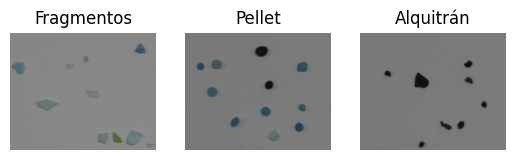

In [4]:
#Cargamos tres subimágenes de cada uno de los tres tipos considerados (el alquitrán efectivamenet no es microplástico)
imgF = cv2.imread('FRA.png') 
imgP = cv2.imread('PEL.png') 
imgT = cv2.imread('TAR.png') 

#Mostramos
plt.subplot(131)
plt.axis("off")
plt.imshow(imgF) 
plt.title('Fragmentos')
plt.subplot(132)
plt.axis("off")
plt.imshow(imgP) 
plt.title('Pellet')
plt.subplot(133)
plt.axis("off")
plt.imshow(imgT) 
plt.title('Alquitrán')
plt.show()

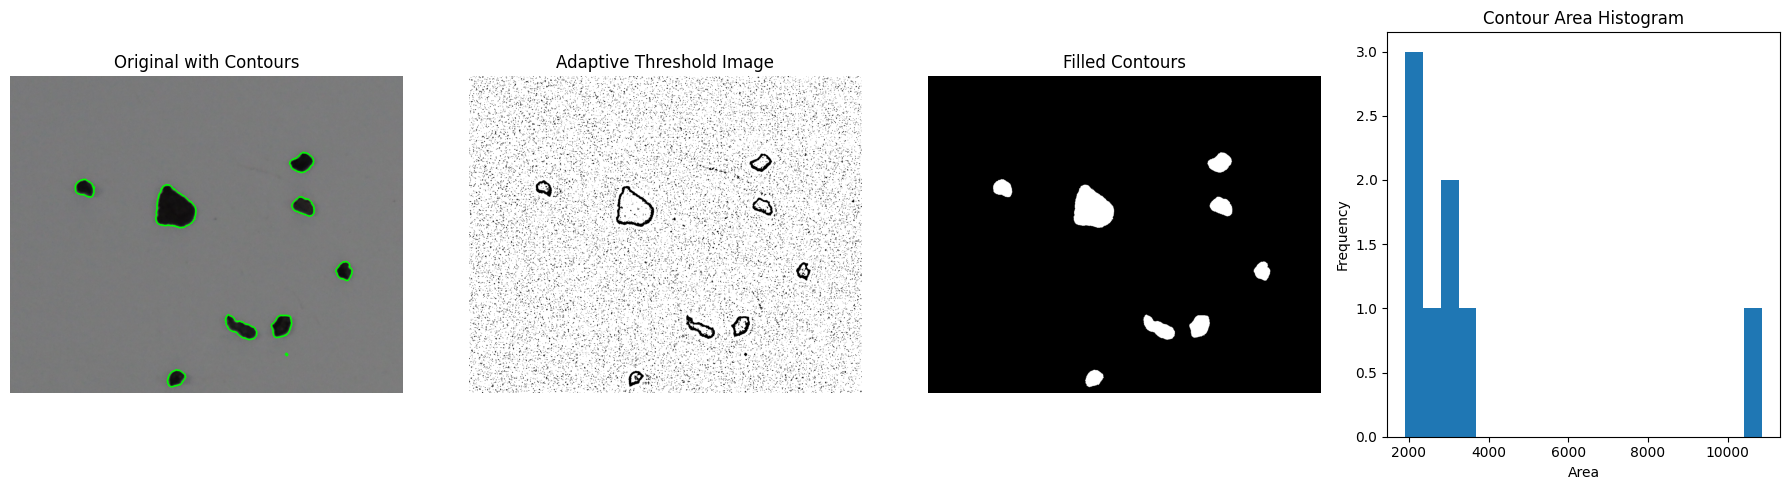

In [5]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def calculate_contour_properties(image_path, lower_threshold, upper_threshold, min_area):
    # Load the image
    img = cv2.imread(image_path)
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert to RGB for display
    img_gris = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # Umbralización adaptativa
    img_th_adaptive = cv2.adaptiveThreshold(img_gris, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 11, 2)

    # Aplica la umbralización de banda
    img_th_band = cv2.inRange(img_gris, lower_threshold, upper_threshold)

    # Suaviza altas frecuencias
    pimg = cv2.medianBlur(img_gris, 7)

    # Encuentra los contornos externos
    contours, _ = cv2.findContours(img_th_band, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Crea una imagen vacía para dibujar los contornos
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    cv2.drawContours(img_rgb, contours, -1, (0, 255, 0), 3)

    # Crea una imagen vacía para dibujar contornos rellenos
    img_cont = np.zeros(img_rgb.shape, dtype=np.uint8)

    propertiesTAR = {
        'area': [],
        'perimeter': [],
        'rect': [],
        'ellipse': [],
        'aspect_ratio': [],
        'solidity': [],
        'extent': []
    }

    for c in contours:
        # Área del contorno
        area = cv2.contourArea(c)
        if (area > min_area):
            propertiesTAR['area'].append(area)

            # Perímetro del contorno
            perimeter = cv2.arcLength(c, True)
            propertiesTAR['perimeter'].append(perimeter)

            # Contenedor alineado con ejes de la imagen
            x, y, w, h = cv2.boundingRect(c)
            propertiesTAR['rect'].append((x, y, w, h))

            # Elipse ajustada al contorno
            if len(c) > 7:
                ellipse = cv2.fitEllipse(c)
                propertiesTAR['ellipse'].append(ellipse)

                # Calculate aspect ratio of the minimum bounding rectangle
                width = w
                height = h
                aspect_ratio = width / height
                propertiesTAR['aspect_ratio'].append(aspect_ratio)

                # Calculate solidity of the contour
                hull = cv2.convexHull(c)
                solidity = area / cv2.contourArea(hull)
                propertiesTAR['solidity'].append(solidity)

                # Calculate extent of the contour
                extent = area / (w * h)
                propertiesTAR['extent'].append(extent)

                # Dibuja los contornos rellenos en la imagen vacía
                cv2.drawContours(img_cont, [c], -1, (255, 255, 255), thickness=cv2.FILLED)

    return img_rgb, img_th_adaptive, pimg, img_cont, propertiesTAR

# Example usage
image_path = 'TAR.png'
lower_threshold = 80
upper_threshold = 100
min_area = 200
img_rgb, img_th_adaptive, pimg, img_cont, contour_properties_tar = calculate_contour_properties(image_path, lower_threshold, upper_threshold, min_area)

# Plot the results
fig, axes = plt.subplots(1, 4, figsize=(18, 5))

# Display the original image with contours in the first subplot
axes[0].imshow(img_rgb)
axes[0].set_title('Original with Contours')
axes[0].axis("off")

# Display the adaptive threshold image in the second subplot
axes[1].imshow(img_th_adaptive, cmap='gray')
axes[1].set_title('Adaptive Threshold Image')
axes[1].axis("off")

# Display the filled contours in the third subplot
axes[2].imshow(img_cont, cmap='gray')
axes[2].set_title('Filled Contours')
axes[2].axis("off")

# Plot a histogram of the contour areas in the fourth subplot
axes[3].hist(contour_properties_tar['area'], bins=20)
axes[3].set_title('Contour Area Histogram')
axes[3].set_xlabel('Area')
axes[3].set_ylabel('Frequency')

plt.tight_layout()
plt.show()


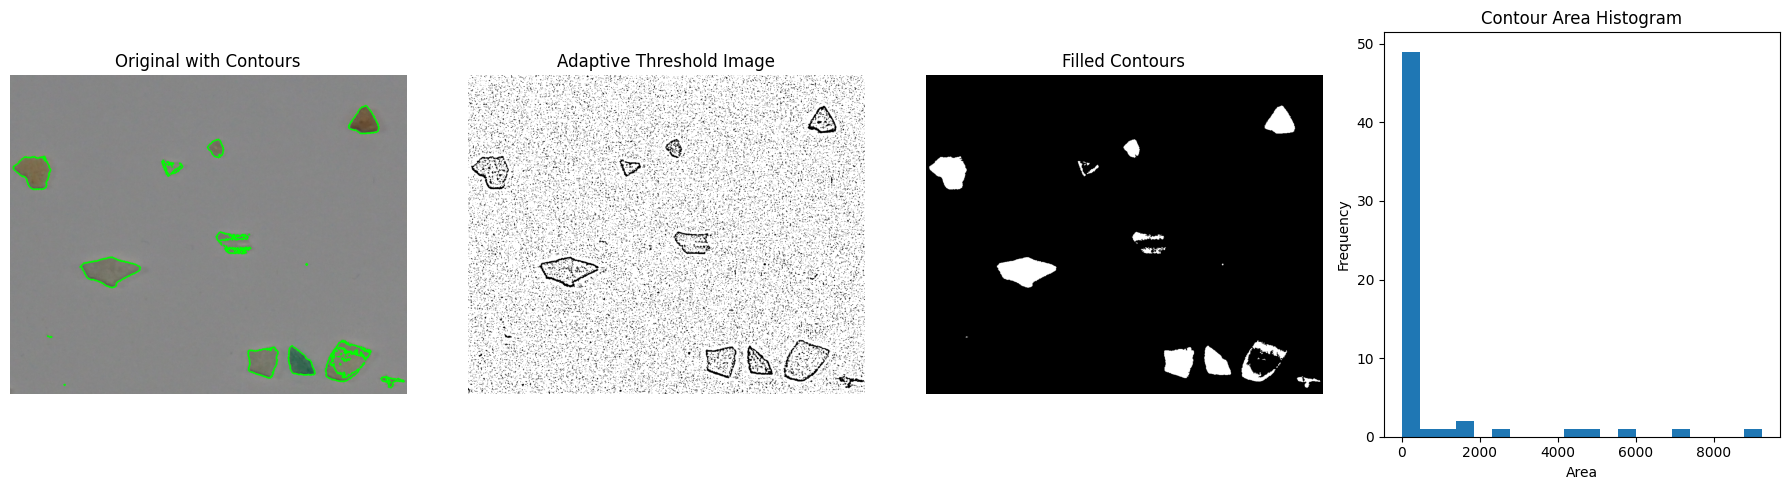

In [6]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def calculate_contour_properties(image_path, lower_threshold, upper_threshold, min_area):
    # Load the image
    img = cv2.imread(image_path)
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert to RGB for display
    img_gris = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # Umbralización adaptativa
    img_th_adaptive = cv2.adaptiveThreshold(img_gris, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 11, 2)

    # Aplica la umbralización de banda
    img_th_band = cv2.inRange(img_gris, lower_threshold, upper_threshold)

    # Suaviza altas frecuencias
    pimg = cv2.medianBlur(img_gris, 7)

    # Encuentra los contornos externos
    contours, _ = cv2.findContours(img_th_band, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Crea una imagen vacía para dibujar los contornos
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    cv2.drawContours(img_rgb, contours, -1, (0, 255, 0), 3)

    # Crea una imagen vacía para dibujar contornos rellenos
    img_cont = np.zeros(img_rgb.shape, dtype=np.uint8)

    propertiesFRA = {
        'area': [],
        'perimeter': [],
        'rect': [],
        'ellipse': [],
        'aspect_ratio': [],
        'solidity': [],
        'extent': []
    }

    for c in contours:
        # Área del contorno
        area = cv2.contourArea(c)
        if (area > min_area):
            propertiesFRA['area'].append(area)

            # Perímetro del contorno
            perimeter = cv2.arcLength(c, True)
            propertiesFRA['perimeter'].append(perimeter)

            # Contenedor alineado con ejes de la imagen
            x, y, w, h = cv2.boundingRect(c)
            propertiesFRA['rect'].append((x, y, w, h))

            # Elipse ajustada al contorno
            if len(c) > 7:
                ellipse = cv2.fitEllipse(c)
                propertiesFRA['ellipse'].append(ellipse)

                # Calculate aspect ratio of the minimum bounding rectangle
                width = w
                height = h
                aspect_ratio = width / height
                propertiesFRA['aspect_ratio'].append(aspect_ratio)

                # Calculate solidity of the contour
                hull = cv2.convexHull(c)
                solidity = area / cv2.contourArea(hull)
                propertiesFRA['solidity'].append(solidity)

                # Calculate extent of the contour
                extent = area / (w * h)
                propertiesFRA['extent'].append(extent)

                # Dibuja los contornos rellenos en la imagen vacía
                cv2.drawContours(img_cont, [c], -1, (255, 255, 255), thickness=cv2.FILLED)

    return img_rgb, img_th_adaptive, pimg, img_cont, propertiesFRA

# Example usage
image_path = 'FRA.png'
lower_threshold = 50
upper_threshold = 120
min_area = 0
img_rgb, img_th_adaptive, pimg, img_cont, contour_properties_frag = calculate_contour_properties(image_path, lower_threshold, upper_threshold, min_area)

# Plot the results
fig, axes = plt.subplots(1, 4, figsize=(18, 5))

# Display the original image with contours in the first subplot
axes[0].imshow(img_rgb)
axes[0].set_title('Original with Contours')
axes[0].axis("off")

# Display the adaptive threshold image in the second subplot
axes[1].imshow(img_th_adaptive, cmap='gray')
axes[1].set_title('Adaptive Threshold Image')
axes[1].axis("off")

# Display the filled contours in the third subplot
axes[2].imshow(img_cont, cmap='gray')
axes[2].set_title('Filled Contours')
axes[2].axis("off")

# Plot a histogram of the contour areas in the fourth subplot
axes[3].hist(contour_properties_frag['area'], bins=20)
axes[3].set_title('Contour Area Histogram')
axes[3].set_xlabel('Area')
axes[3].set_ylabel('Frequency')

plt.tight_layout()
plt.show()


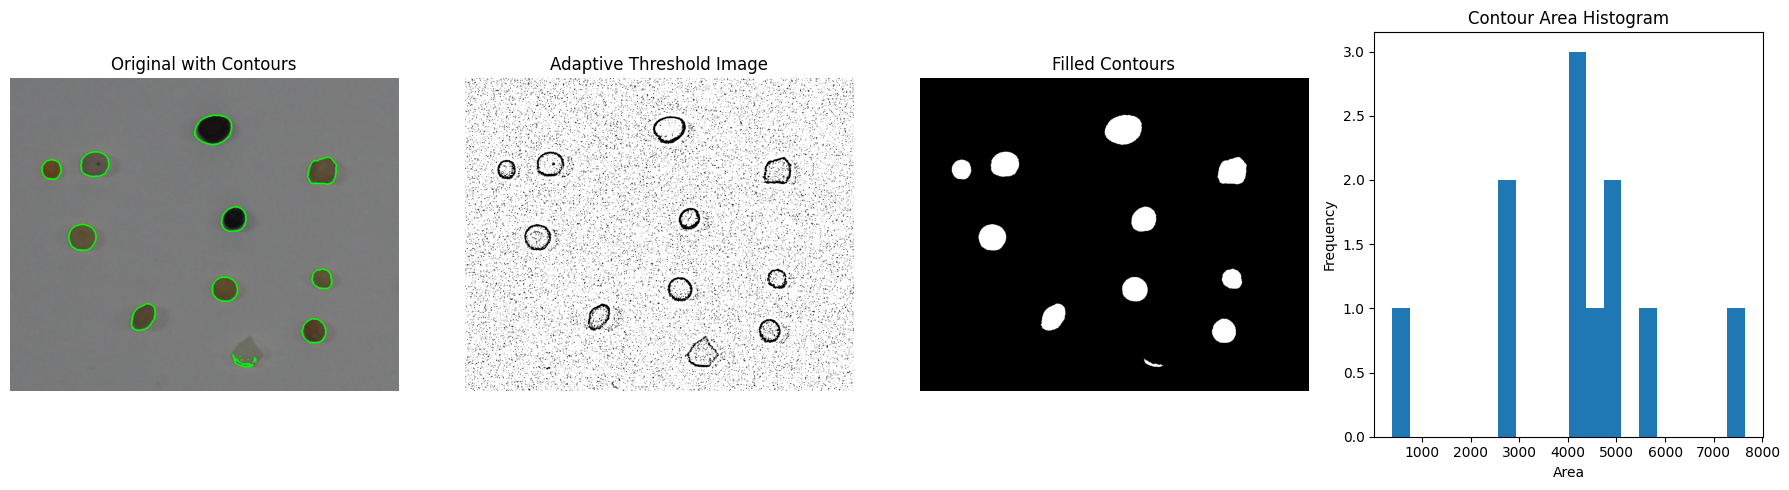

In [7]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def calculate_contour_properties(image_path, lower_threshold, upper_threshold, min_area):
    # Load the image
    img = cv2.imread(image_path)
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert to RGB for display
    img_gris = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # Umbralización adaptativa
    img_th_adaptive = cv2.adaptiveThreshold(img_gris, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 11, 2)

    # Aplica la umbralización de banda
    img_th_band = cv2.inRange(img_gris, lower_threshold, upper_threshold)

    # Suaviza altas frecuencias
    pimg = cv2.medianBlur(img_gris, 7)

    # Encuentra los contornos externos
    contours, _ = cv2.findContours(img_th_band, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Crea una imagen vacía para dibujar los contornos
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    cv2.drawContours(img_rgb, contours, -1, (0, 255, 0), 3)

    # Crea una imagen vacía para dibujar contornos rellenos
    img_cont = np.zeros(img_rgb.shape, dtype=np.uint8)

    propertiesPEL = {
        'area': [],
        'perimeter': [],
        'rect': [],
        'ellipse': [],
        'aspect_ratio': [],
        'solidity': [],
        'extent': []
    }

    for c in contours:
        # Área del contorno
        area = cv2.contourArea(c)
        if (area > min_area):
            propertiesPEL['area'].append(area)

            # Perímetro del contorno
            perimeter = cv2.arcLength(c, True)
            propertiesPEL['perimeter'].append(perimeter)

            # Contenedor alineado con ejes de la imagen
            x, y, w, h = cv2.boundingRect(c)
            propertiesPEL['rect'].append((x, y, w, h))

            # Elipse ajustada al contorno
            if len(c) > 5: 
                ellipse = cv2.fitEllipse(c)
                propertiesPEL['ellipse'].append(ellipse)

                # Calculate aspect ratio of the minimum bounding rectangle
                width = w
                height = h
                aspect_ratio = width / height
                propertiesPEL['aspect_ratio'].append(aspect_ratio)

                # Calculate solidity of the contour
                hull = cv2.convexHull(c)
                solidity = area / cv2.contourArea(hull)
                propertiesPEL['solidity'].append(solidity)

                # Calculate extent of the contour
                extent = area / (w * h)
                propertiesPEL['extent'].append(extent)

                # Dibuja los contornos rellenos en la imagen vacía
                cv2.drawContours(img_cont, [c], -1, (255, 255, 255), thickness=cv2.FILLED)

    return img_rgb, img_th_adaptive, pimg, img_cont, propertiesPEL

# Example usage
image_path = 'PEL.png'
lower_threshold = 50
upper_threshold = 100
min_area = 150
img_rgb, img_th_adaptive, pimg, img_cont, contour_properties_pellet = calculate_contour_properties(image_path, lower_threshold, upper_threshold, min_area)

# Plot the results
fig, axes = plt.subplots(1, 4, figsize=(18, 5))

# Display the original image with contours in the first subplot
axes[0].imshow(img_rgb)
axes[0].set_title('Original with Contours')
axes[0].axis("off")

# Display the adaptive threshold image in the second subplot
axes[1].imshow(img_th_adaptive, cmap='gray')
axes[1].set_title('Adaptive Threshold Image')
axes[1].axis("off")

# Display the filled contours in the third subplot
axes[2].imshow(img_cont, cmap='gray')
axes[2].set_title('Filled Contours')
axes[2].axis("off")

# Plot a histogram of the contour areas in the fourth subplot
axes[3].hist(contour_properties_pellet['area'], bins=20)
axes[3].set_title('Contour Area Histogram')
axes[3].set_xlabel('Area')
axes[3].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

In [8]:
# Obtener las relaciones de aspecto para cada tipo de microplástico
aspect_ratio_pellet = contour_properties_pellet['aspect_ratio']
aspect_ratio_tar = contour_properties_tar['aspect_ratio']
aspect_ratio_frag = contour_properties_frag['aspect_ratio']

# Función para calcular la relación de aspecto promedio
def calcular_relacion_aspecto_promedio(aspect_ratios):
    return np.mean(aspect_ratios)

# Calcular el promedio de las relaciones de aspecto para cada tipo de microplástico
promedio_pellet = calcular_relacion_aspecto_promedio(aspect_ratio_pellet)
promedio_tar = calcular_relacion_aspecto_promedio(aspect_ratio_tar)
promedio_frag = calcular_relacion_aspecto_promedio(aspect_ratio_frag)

# Calcular el mínimo y el máximo de las relaciones de aspecto para cada tipo de microplástico
min_pellet = np.min(aspect_ratio_pellet)
min_tar = np.min(aspect_ratio_tar)
min_frag = np.min(aspect_ratio_frag)

max_pellet = np.max(aspect_ratio_pellet)
max_tar = np.max(aspect_ratio_tar)
max_frag = np.max(aspect_ratio_frag)

# Obtain the area information for each type of microplastic
area_pellet = contour_properties_pellet['area']
area_tar = contour_properties_tar['area']
area_frag = contour_properties_frag['area']

# Calculate the minimum and maximum areas for each type
min_area_pellet = np.min(area_pellet)
min_area_tar = np.min(area_tar)
min_area_frag = np.min(area_frag)

max_area_pellet = np.max(area_pellet)
max_area_tar = np.max(area_tar)
max_area_frag = np.max(area_frag)

ellipses_tar = contour_properties_tar['ellipse']
ellipses_pel = contour_properties_pellet['ellipse']
ellipses_frag = contour_properties_frag['ellipse']

major_axis_lengths_tar = [max(ellipse[1]) for ellipse in ellipses_tar]
major_axis_lengths_pel = [max(ellipse[1]) for ellipse in ellipses_pel]
major_axis_lengths_frag = [max(ellipse[1]) for ellipse in ellipses_frag]

min_major_axis_tar = min(major_axis_lengths_tar)
max_major_axis_tar = max(major_axis_lengths_tar)

min_major_axis_pellet = min(major_axis_lengths_pel)
max_major_axis_pellet = max(major_axis_lengths_pel)

min_major_axis_frag = min(major_axis_lengths_frag)
max_major_axis_frag = max(major_axis_lengths_frag)

# Comparar los promedios y determinar cuál es más redondeado
if promedio_pellet > promedio_tar and promedio_pellet > promedio_frag:
    print("Los microplásticos de tipo pellet son más redondeados.")
elif promedio_tar > promedio_pellet and promedio_tar > promedio_frag:
    print("Los microplásticos de tipo tar son más redondeados.")
else:
    print("Los microplásticos de tipo frag son más redondeados.")


Los microplásticos de tipo frag son más redondeados.


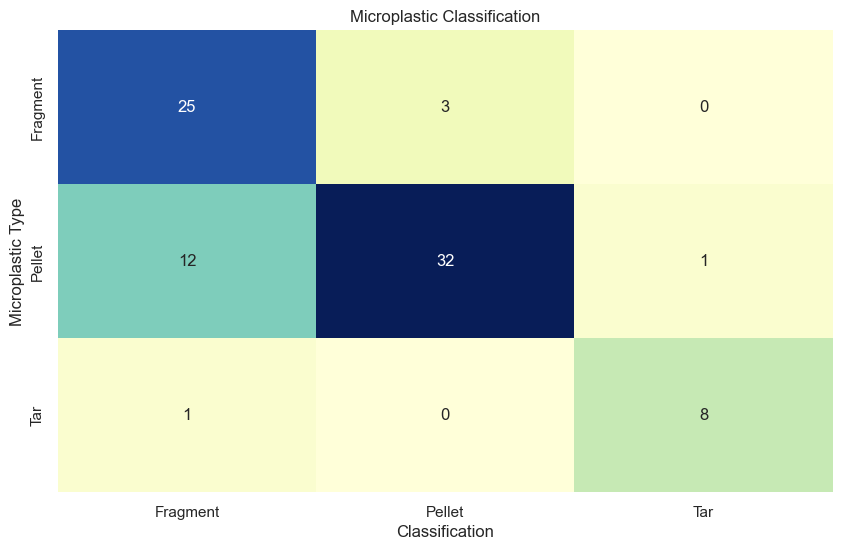

In [11]:
import cv2
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

def calcula_identificador(c):
    return round(cv2.contourArea(c) * cv2.arcLength(c, True), 4)

def classify_contour(c, img_rgb):
    elipse = cv2.fitEllipse(c)
    
    aspect_ratio = cv2.fitEllipse(c)[1][0] / cv2.fitEllipse(c)[1][1]
    area = cv2.contourArea(c)  # Calculate the area directly here
    
    # Define thresholds for each type of microplastic based on the aspect ratio, area, and major axis length
    pellet_thresholds = {
        'aspect_ratio': (min_pellet - 0.05 * min_pellet, max_pellet + 0.05 * max_pellet),
        'area': (min_area_pellet, max_area_pellet),
        'major_axis': (min_major_axis_pellet, max_major_axis_pellet)  # Define the values of min_major_axis_pellet and max_major_axis_pellet
    }
    
    tar_thresholds = {
        'aspect_ratio': (min_tar - 0.05 * min_tar, max_tar + 0.05 * max_tar),
        'area': (min_area_tar, max_area_tar),
        'major_axis': (min_major_axis_tar, max_major_axis_tar)  # Define the values of min_major_axis_tar and max_major_axis_tar
    }
    
    frag_thresholds = {
        'aspect_ratio': (min_frag - 0.05 * min_frag, max_frag + 0.05 * max_frag),
        'area': (min_area_frag, max_area_frag),
        'major_axis': (min_major_axis_frag, max_major_axis_frag)  # Define the values of min_major_axis_frag and max_major_axis_frag
    }
    
    if check_thresholds(elipse, aspect_ratio, area, pellet_thresholds):
        return "Pellet"
    elif check_thresholds(elipse, aspect_ratio, area, tar_thresholds):
        return "Tar"
    elif check_thresholds(elipse, aspect_ratio, area, frag_thresholds):
        return "Fragment"
    else:
        return "Desconocido"

def check_thresholds(elipse, aspect_ratio, area, thresholds):
    return (
        thresholds['aspect_ratio'][0] <= aspect_ratio <= thresholds['aspect_ratio'][1] #and
        #thresholds['area'][0] <= area <= thresholds['area'][1] and
        #thresholds['major_axis'][0] <= max(elipse[1]) <= thresholds['major_axis'][1]
    )

def clasificador(imagen):
    img = cv2.imread(imagen)
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img_hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

    res_sat, img_th_sat= cv2.threshold(img_hsv[:,:,1], 35, 255, cv2.THRESH_BINARY)

    img_th_val = np.array(img_hsv[:,:,2] < 30).astype('uint8')

    res_sat, img_th_sat2= cv2.threshold(img_hsv[:,:,1], 60, 255, cv2.THRESH_BINARY)

    total_tar = 0
    total_pel = 0
    total_frag = 0
    contornos_procesados = []

    # La image img_th_val es the one that presents tar microplastics the best, so we will count total_tar on it.
    contornos_tar, hierarchy2 = cv2.findContours(img_th_val, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    for c in contornos_tar:
        if cv2.contourArea(c) > 200:
            contornos_procesados.append(calcula_identificador(c))
            if c.shape[0] > 5:
                result = classify_contour(c, img_rgb)
                if result == "Tar":
                    total_tar += 1

    # The image img_th_sat is the one that presents pellet microplastics the best, so we will count total_pel on it.
    contornos_pel, hierarchy2 = cv2.findContours(img_th_sat, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    for c in contornos_pel:
        if cv2.contourArea(c) > 200:
            id = calcula_identificador(c)
            if id not in contornos_procesados:
                contornos_procesados.append(id)
                if c.shape[0] > 5:
                    result = classify_contour(c, img_rgb)
                    if result == "Pellet":
                        total_pel += 1

    # The image img_th_sat2 is the one that presents fragment microplastics the best, so we will count total_frag on it.
    contornos_frag, hierarchy2 = cv2.findContours(img_th_sat2, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    for c in contornos_frag:
        if cv2.contourArea(c) > 200:
            id = calcula_identificador(c)
            if id not in contornos_procesados:
                contornos_procesados.append(id)
                # Create an empty mask the same size as the original image
                if c.shape[0] > 5:
                    result = classify_contour(c, img_rgb)
                    if result == "Fragment":
                        total_frag += 1
    
    # contornos = [contornos_frag, contornos_pel, contornos_tar]
    # i = 0
    # cv2.drawContours(img_rgb, contornos[i], -1, (0,255,0), 3)

    # Display the image with contours
    # plt.figure(figsize=(8, 8))
    # plt.axis("off")
    # plt.imshow(img_rgb)
    # plt.title('Contornos externos')
    # plt.show()
    # i += 1

    return [total_tar, total_pel, total_frag]

# Call your clasificador function to get the classification results
clasificacion_tar = clasificador("tar-03-olympus-10-01-2020.JPG")
clasificacion_pel = clasificador("pellet-03-olympus-10-01-2020.JPG")
clasificacion_frag = clasificador("fragment-03-olympus-10-01-2020.JPG")


# Create a Pandas DataFrame with the desired order of columns
data = {
    "Type": ["Tar", "Pellet", "Fragment"],
    "Tar": [clasificacion_tar[0], clasificacion_pel[0], clasificacion_frag[0]],
    "Pellet": [clasificacion_tar[1], clasificacion_pel[1], clasificacion_frag[1]],
    "Fragment": [clasificacion_tar[2], clasificacion_pel[2], clasificacion_frag[2]],
}

df = pd.DataFrame(data)

# Print the Pandas DataFrame
#print(df)

# Create a heatmap using Seaborn
sns.set()
plt.figure(figsize=(10, 6))
ax = sns.heatmap(df.pivot_table(index="Type", values=["Tar", "Pellet", "Fragment"]), annot=True, fmt=".0f", cmap="YlGnBu", cbar=False)
ax.set_title("Microplastic Classification")
plt.xlabel("Classification")
plt.ylabel("Microplastic Type")

plt.show()